In [34]:
"""
# EDA #1 - Let's compare how a swimmer's progression for ONE SPECIFIC EVENT (in terms of the cuts that they make) goes for their Stroke_1 over an event that is not in their Stroke_1, Stroke_2, Stroke_3

# Problem Statement: The goal is to create a time-series model that predicts a swimmer’s specialized strokes at age 18+ based on their historical race performances before 18. To do this, we will take older swimmers' data who have already developed into a specialty stroke over time and analyze what that regression was like! 

# For each swimmer, we have multiple historical races recorded over time. The key time-dependent variables are:

Time Series Features (X):
- Age: The swimmer's age at the time of the swim.
- Event: The stroke and distance of the event.
- Swim Time: The recorded time for that event.
- Time Standard Achieved: Did they meet national cut times?
- Performance Relative to Peers: Rank relative to competitors.

Target Variable (y): 
Specialized Stroke(s) at age 18+.

Meet / Time Standards: 
Olympic Trials  - 24 points
Summer Nationals - 19 points
Winter US Open - 15 points
Summer Juniors - 12 points
Winter Juniors - 10 points
Futures - 8 points
AAAA - 6 points
AAA - 5 points
AA - 4 points
A - 3 points
BB - 2 points
B - 1 point
Slower Than B - 0 points

First: 

The goal is to compare:

Swimmers who have that event as their Stroke_1 (specialized stroke)
Swimmers who do NOT have that event in their strokes at all
We'll analyze how their Time_Cut Points evolve over time.

Choose an Event: Select a specific event to analyze (e.g., "100 FR SCY").
Filter Data: Separate swimmers into:
Those who have this event as Stroke_1.
Those who do not have this event in their Strokes at all.
Plot Progression: Track time cut points over age for both groups.

"""

'\n# EDA #1 - Let\'s compare how a swimmer\'s progression for ONE SPECIFIC EVENT (in terms of the cuts that they make) goes for their Stroke_1 over an event that is not in their Stroke_1, Stroke_2, Stroke_3\n\n# Problem Statement: The goal is to create a time-series model that predicts a swimmer’s specialized strokes at age 18+ based on their historical race performances before 18. To do this, we will take older swimmers\' data who have already developed into a specialty stroke over time and analyze what that regression was like! \n\n# For each swimmer, we have multiple historical races recorded over time. The key time-dependent variables are:\n\nTime Series Features (X):\n- Age: The swimmer\'s age at the time of the swim.\n- Event: The stroke and distance of the event.\n- Swim Time: The recorded time for that event.\n- Time Standard Achieved: Did they meet national cut times?\n- Performance Relative to Peers: Rank relative to competitors.\n\nTarget Variable (y): \nSpecialized Stroke(s

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_file = "./usaa_swim_data/swimmers_cleaned.csv"

# Filter data for this event
df_cleaned = pd.read_csv(data_file)

In [36]:
# Set the event to analyze
event_to_analyze = "200 FR SCY"

# Filter data for this event
df_event = df_cleaned[df_cleaned["Event"] == event_to_analyze]


In [37]:
# Separate swimmers:
# 1. Those who have this event as Stroke_1 (specialists)
df_specialists = df_event[df_event["Stroke_1"].str.contains("free", case=False, na=False)]

# 2. Select non-specialists: Those who do NOT have "free" in Stroke_1, Stroke_2, or Stroke_3
df_non_specialists = df_event[
    ~df_event[["Stroke_1", "Stroke_2", "Stroke_3"]]
    .apply(lambda x: x.str.contains("free", case=False, na=False))
    .any(axis=1)
]

# Print counts for verification
print(f"Specialists Count: {len(df_specialists)}")
print(f"Non-Specialists Count: {len(df_non_specialists)}")


Specialists Count: 1146
Non-Specialists Count: 2559


In [38]:
# Check missing values
print(df_specialists[["Age_at_time_of_Swim", "Time_cut_points"]].isnull().sum())
print(df_non_specialists[["Age_at_time_of_Swim", "Time_cut_points"]].isnull().sum())
      
      

Age_at_time_of_Swim    0
Time_cut_points        0
dtype: int64
Age_at_time_of_Swim    0
Time_cut_points        0
dtype: int64


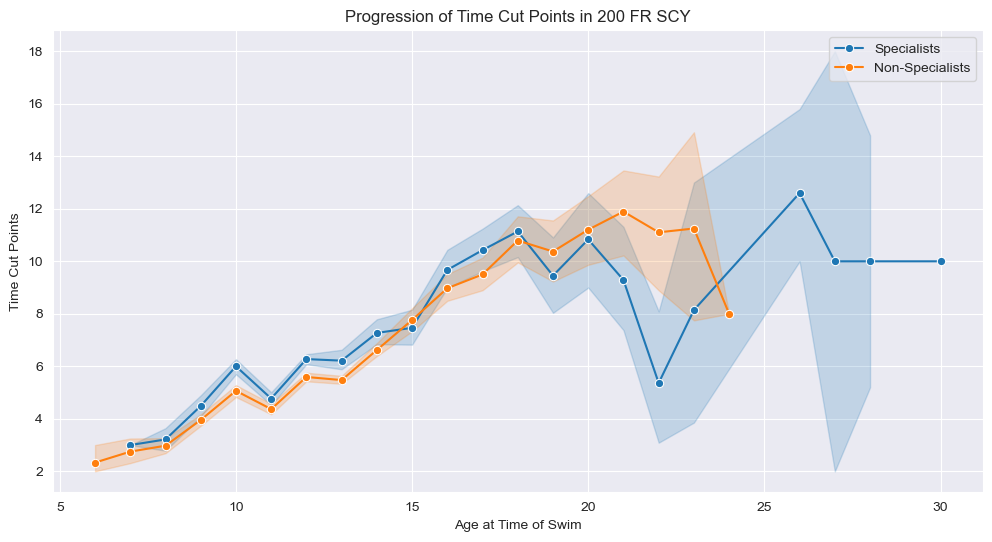

In [39]:
# Plot progression of Time Cut Points over Age
plt.figure(figsize=(12, 6))

# Specialists
sns.lineplot(data=df_specialists, x="Age_at_time_of_Swim", y="Time_cut_points", label="Specialists", marker="o")

# Non-Specialists
sns.lineplot(data=df_non_specialists, x="Age_at_time_of_Swim", y="Time_cut_points", label="Non-Specialists", marker="o")


plt.xlabel("Age at Time of Swim")
plt.ylabel("Time Cut Points")
plt.title(f"Progression of Time Cut Points in {event_to_analyze}")
plt.legend()
plt.grid(True)
plt.show()

/var/folders/pk/bv7c7cl128b6t54cnh2ks2km0000gn/T/ipykernel_74369/1349347291.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(
/var/folders/pk/bv7c7cl128b6t54cnh2ks2km0000gn/T/ipykernel_74369/1349347291.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


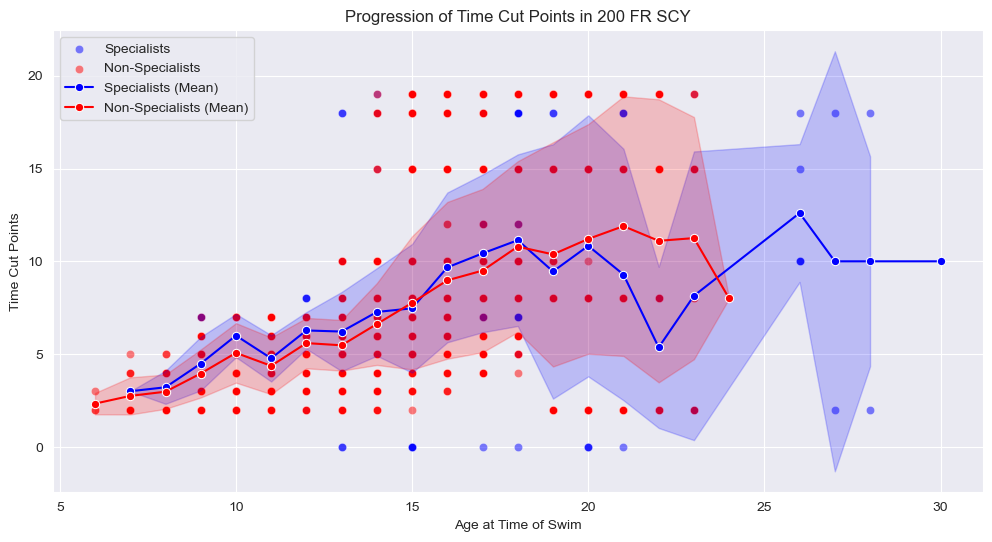

In [40]:
plt.figure(figsize=(12, 6))

# Scatter plot for individual data points to show range
sns.scatterplot(data=df_specialists, x="Age_at_time_of_Swim", y="Time_cut_points", label="Specialists", color="blue", alpha=0.5)
sns.scatterplot(data=df_non_specialists, x="Age_at_time_of_Swim", y="Time_cut_points", label="Non-Specialists", color="red", alpha=0.5)

# Lineplot to show central tendency with standard deviation as error bars
sns.lineplot(
    data=df_specialists, x="Age_at_time_of_Swim", y="Time_cut_points", 
    label="Specialists (Mean)", marker="o", ci="sd", color="blue"
)

sns.lineplot(
    data=df_non_specialists, x="Age_at_time_of_Swim", y="Time_cut_points", 
    label="Non-Specialists (Mean)", marker="o", ci="sd", color="red"
)

plt.xlabel("Age at Time of Swim")
plt.ylabel("Time Cut Points")
plt.title(f"Progression of Time Cut Points in {event_to_analyze}")
plt.legend()
plt.grid(True)
plt.show()